In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("tcp-connection (1).csv")

In [3]:
print("Training data has {} rows & {} columns".format(df.shape[0],df.shape[1]))
df.head()

Training data has 494021 rows & 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [4]:
#check for any missing values
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
# Extract feature columns
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

In [6]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

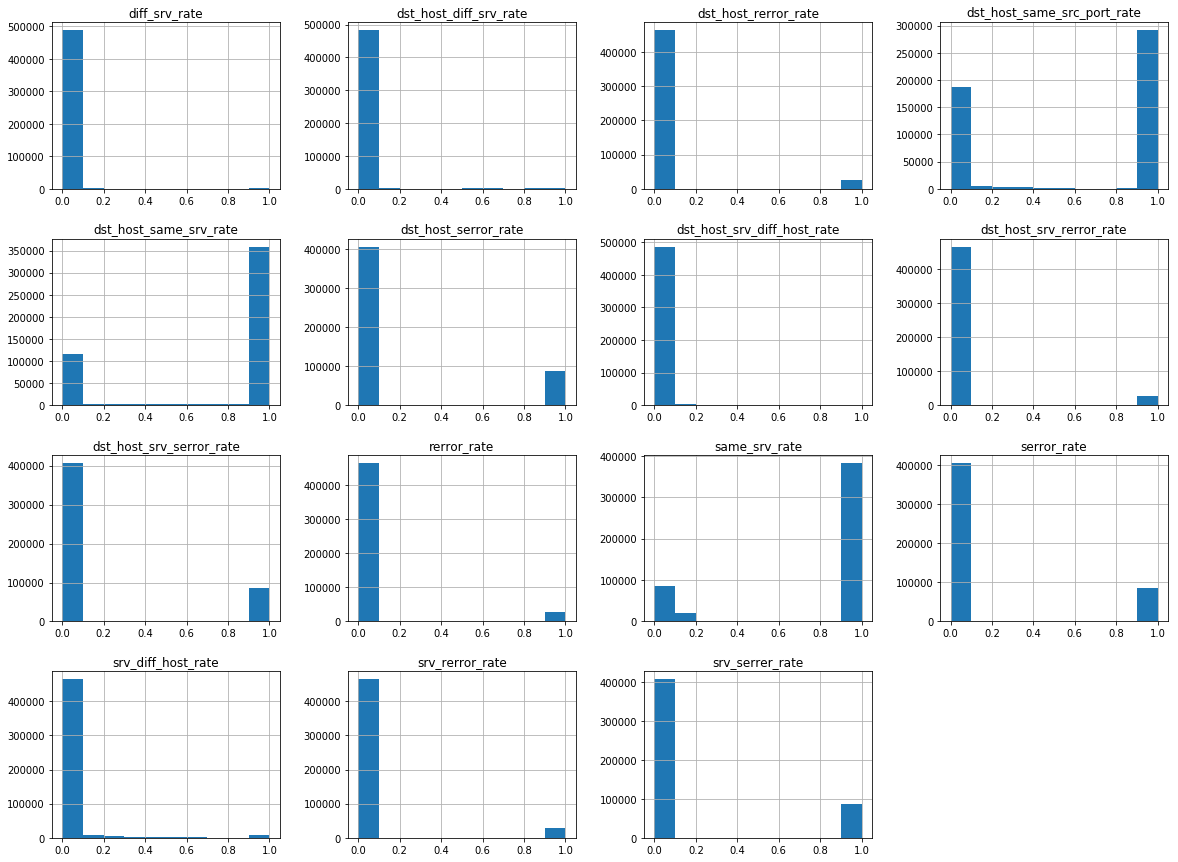

In [7]:
freqgraph = df.select_dtypes(include={'float'})
freqgraph.hist(figsize=(20,15))
plt.show()

In [8]:
df['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

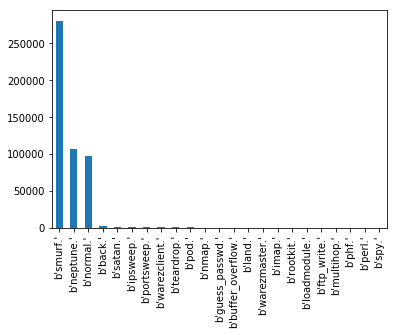

In [9]:
df['intrusion'].value_counts().plot(kind='bar')

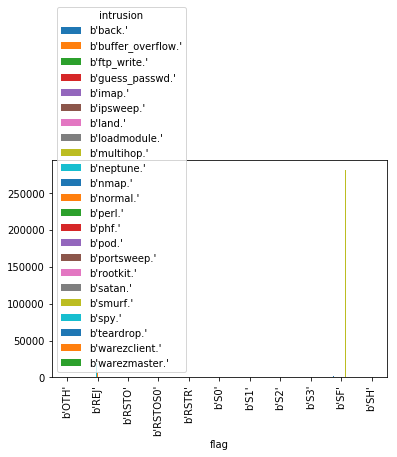

In [10]:
pd.crosstab(df['flag'],df['intrusion']).plot(kind='bar')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

In [12]:
# Separate the data into feature data and target data (X and y, respectively)
x=df.drop(['intrusion'],axis=1)
y=pd.DataFrame(df['intrusion'])

In [13]:
from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)
x.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,11,9,38,115,0,0,0,0,...,139,89,64,1,1,0,0,0,0,0
1,0,1,50,9,1445,364,0,0,0,0,...,5,116,100,0,20,2,0,0,0,0
2,0,0,14,9,988,0,0,0,0,0,...,255,255,100,0,100,0,0,0,0,0
3,0,0,14,9,988,0,0,0,0,0,...,255,255,100,0,100,0,0,0,0,0
4,0,1,45,5,0,0,0,0,0,0,...,255,6,2,7,0,0,99,71,0,0


In [14]:
y = y.apply(LabelEncoder().fit_transform)
y.head()

,intrusion
0,11
1,11
2,18
3,18
4,9


In [15]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [16]:
#min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# Naïve Bayes’ Classifier

In [17]:
#fitting gaussian naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
classifier1=GaussianNB()
classifier1.fit(x_train,y_train)
y_pred=classifier1.predict(x_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9296471426489401


In [18]:
#confusion metrix
confusion_matrix(y_test,y_pred)

array([[  540,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     5,     0,     0,     0,     0,     0,     0,
            0,     0,     1,     0],
       [    0,     7,     0,     0,     0,     0,     0,     1,     0,
            0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     3],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,    11,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     3,     0,     0,     0,     0,
            0,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,   287,    21,     0

In [19]:
#fitting bernoulli naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9320599808916166


In [20]:
#fitting multinomial naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9459783330364516


In [21]:
#fitting complement naive bayes to the training set
from sklearn.naive_bayes import ComplementNB
classifier=ComplementNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9645604262141111


Complement naive bayes model is the best fit model beacause it have accuracy equal to 96.5%